# Lab 4

April 27, 2023

## 1 Autorzy
- Mateusz Łopaciński
- Mateusz Mazur

## 2 Przygotowanie danych
### 2.1 Wczytanie danych
W pierwszej kolejności wczytamy dane ze zbiorów danych, na których będziemy pracować.

In [90]:
import pandas as pd
import numpy as np
column_names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","class"]
adult_df = pd.read_csv('dataset/adult-all.csv', header=None,names=column_names)

Zobaczmy, czy dane zostały prawidłowo wczytane (czy zgadzają się typy danych)

In [91]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Sprawdźmy również kilka początkowych wartości z obu zbiorów

### 2.2 Usunięcie brakujących danych.

In [92]:
adult_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Aby sprawdzić liczbę brakujących wartości zastępujemy "?" nullami.

In [93]:
adult_df.replace('?', np.nan, inplace=True)
adult_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

<AxesSubplot: >

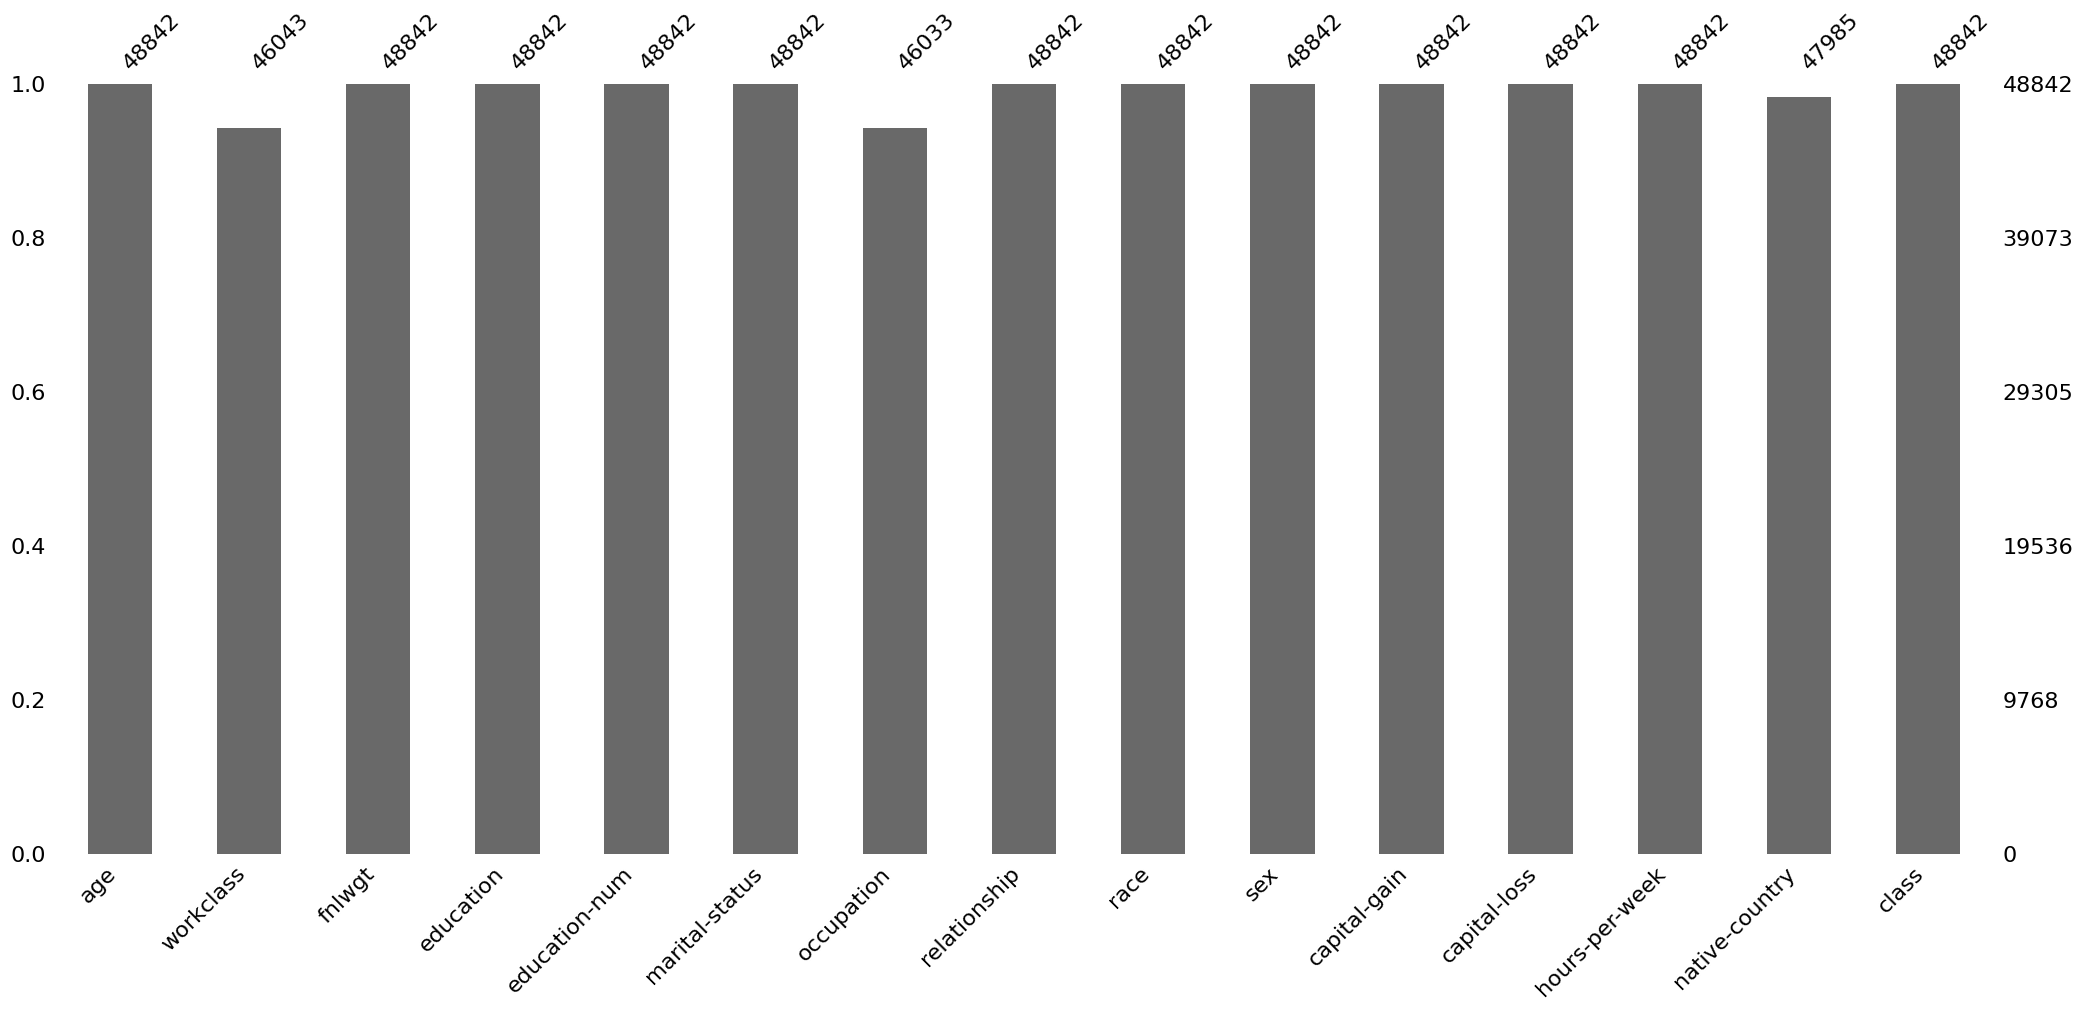

In [94]:
import missingno as msno
msno.bar(adult_df)

Jak widzimy, większość brakujących danych, to dane kategoryczne. Usuniemy wiersze je zawierające.

In [95]:
adult_df=adult_df.dropna()
adult_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

Usuwamy również kolumnę "education" zostawiając "education-num", która niesie dla nas tę samą informację.

In [96]:
adult_df = adult_df.drop("education", axis=1)
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education-num   45222 non-null  int64 
 4   marital-status  45222 non-null  object
 5   occupation      45222 non-null  object
 6   relationship    45222 non-null  object
 7   race            45222 non-null  object
 8   sex             45222 non-null  object
 9   capital-gain    45222 non-null  int64 
 10  capital-loss    45222 non-null  int64 
 11  hours-per-week  45222 non-null  int64 
 12  native-country  45222 non-null  object
 13  class           45222 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


### 2.3 Normalizacja danych liczbowych



Normalizujemy zmienne numeryczne

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]
adult_df[numeric_cols] = scaler.fit_transform(adult_df[numeric_cols])

In [98]:
adult_df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0.034201,State-gov,-1.062295,13,Never-married,Adm-clerical,Not-in-family,White,Male,0.142888,-0.21878,-0.078120,United-States,<=50K
1,0.866417,Self-emp-not-inc,-1.007438,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.146733,-0.21878,-2.326738,United-States,<=50K
2,-0.041455,Private,0.245284,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
3,1.093385,Private,0.425853,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.146733,-0.21878,-0.078120,United-States,<=50K
4,-0.798015,Private,1.407393,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.146733,-0.21878,-0.078120,Cuba,<=50K


Kodujemy teraz wartości nominalne poprzez one-hot-encoding

In [99]:
adult_df = pd.get_dummies(data=adult_df,columns=["workclass","education-num","marital-status","occupation","relationship","race","sex","native-country"])
adult_df.shape

(45222, 104)

In [100]:
adult_df["class"] = (adult_df["class"] == ">50K").astype(np.int8)

adult_df["class"].value_counts()

0    34014
1    11208
Name: class, dtype: int64

### 3 Pomiary

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import  cross_validate, KFold
from sklearn.metrics import make_scorer,accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve


def rf_classify(est,df):
    
    X, y = df.drop('class', axis=1), df['class']

    # Define the hyperparameter grid to search over
    param_grid = {
        'n_estimators': [50, 100, 200, 500],
        'max_features': ['sqrt', 'log2'],
        'min_samples_split': [2, 3, 5],
        'min_samples_leaf': [1, 2]
    }
    scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

    # Define the inner and outer cross-validation folds
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
    outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Define the grid search object
    grid_search = GridSearchCV(estimator=est,
                            param_grid=param_grid,
                            scoring=['accuracy','precision','recall'],
                            cv=inner_cv,
                            refit='accuracy')

    # Perform nested cross-validation
    nested_scores = cross_validate(grid_search, X=X, y=y, cv=outer_cv, scoring=scoring)
    print(f"Accuracy mean: {np.mean(nested_scores['test_accuracy'])}")
    print(f"Precision mean: {np.mean(nested_scores['test_precision'])}")
    print(f"Recall mean: {np.mean(nested_scores['test_recall'])}")

    X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.2, random_state=42)

    grid_search.fit(X_train,y_train)

    print(grid_search.best_params_)
    best_params=grid_search.best_params_
    
    rfc = est
    rfc.set_params(n_estimators=best_params["n_estimators"], max_features=best_params["max_features"],min_samples_split=best_params["min_samples_split"],min_samples_leaf=best_params["min_samples_leaf"],random_state=42)

    rfc.fit(X_train,y_train)

    
    important = zip(df.columns, rfc.feature_importances_)
    important=sorted(important,key=lambda x:x[1], reverse=True)
    print("Most important features: ",important[:3])

    plt.figure(figsize=(50,20))
    plt.bar(df.drop("class",axis=1).columns, rfc.feature_importances_, color ='maroon',
        width = 0.4)
    plt.xticks(rotation=45)
    plt.show()

    # roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])
    roc_curve = plot_roc_curve(rfc, X_test, y_test)
    roc_auc = roc_curve.roc_auc
    plt.show()  


Accuracy mean: 0.8608640296478196
Precision mean: 0.7747198738638293
Recall mean: 0.6182789946639734
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Most important features:  [('capital-gain', 0.13024763740982967), ('marital-status_Married-AF-spouse', 0.11519246738026082), ('age', 0.09724744509119308)]


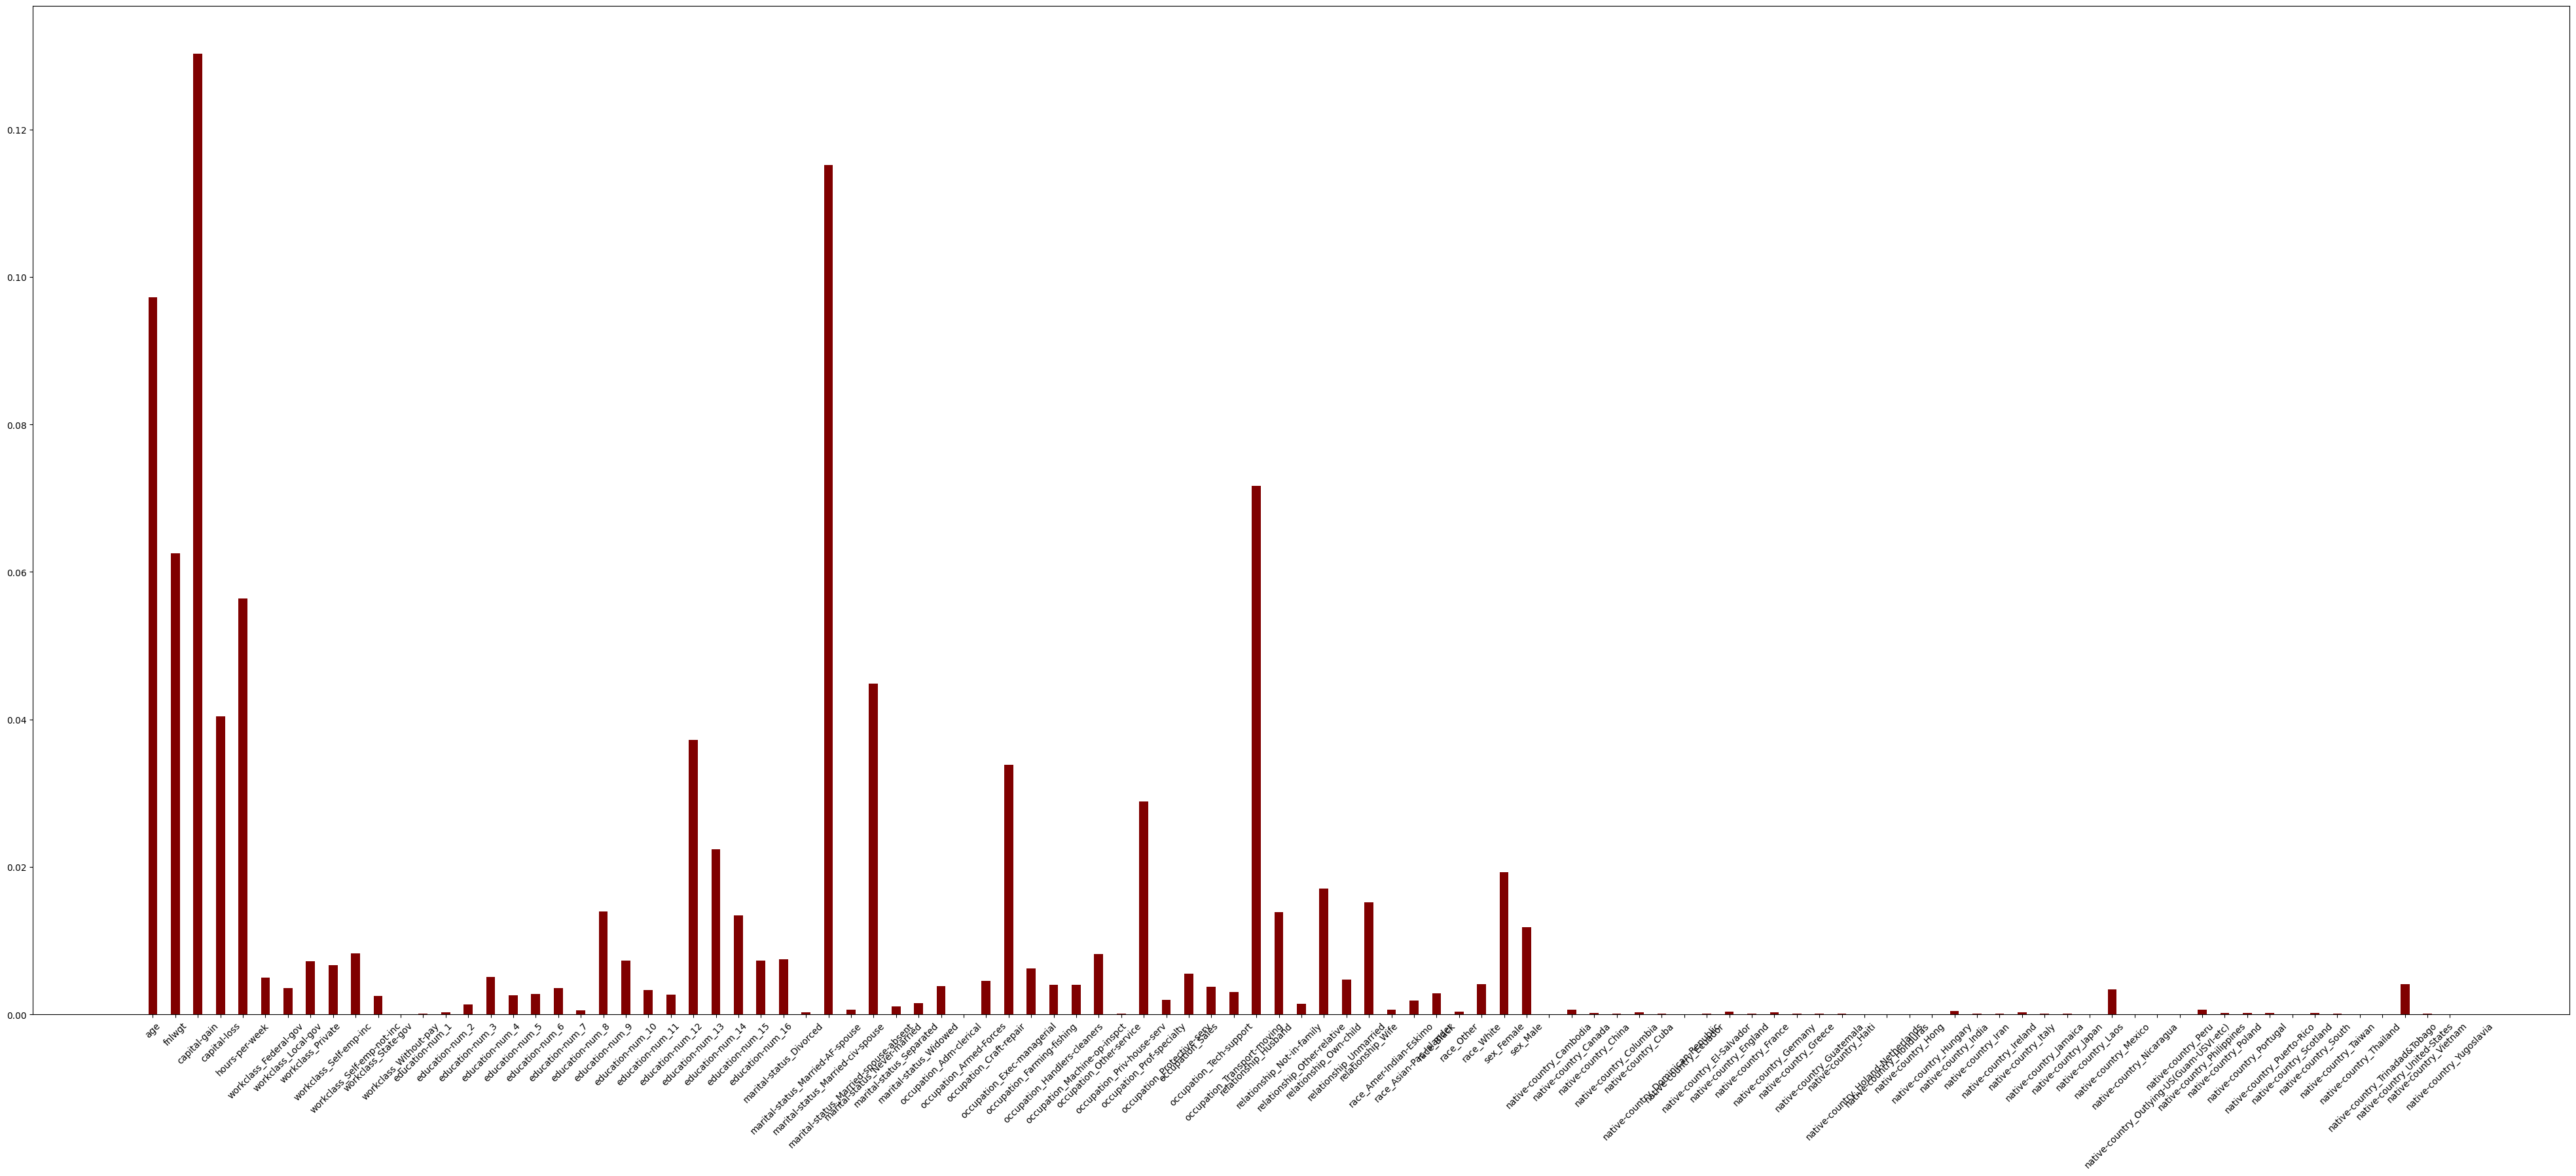

c:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


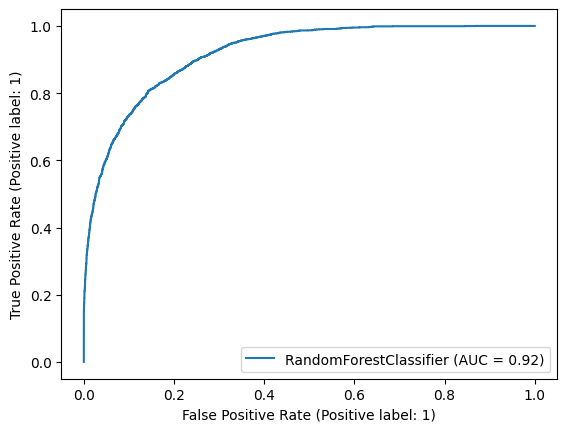

In [102]:
rf_classify(RandomForestClassifier(),adult_df)


### Omówienie wyników dla RandomForstClassifier

Używając GridSearch oraz 5-krotnej walidacji krzyżowej poszukujemy najlepsych parametrów startowych oraz liczymy wartości unbiased accuracy, precsion i recall.

Po wyciągnięciu średniej wartości 



Accuracy mean: 0.8470212307668987
Precision mean: 0.7379925006686369
Recall mean: 0.593623768133156
{'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Most important features:  [('marital-status_Married-AF-spouse', 0.1438130118676264), ('occupation_Transport-moving', 0.09132946176689039), ('capital-gain', 0.07034360554281305)]


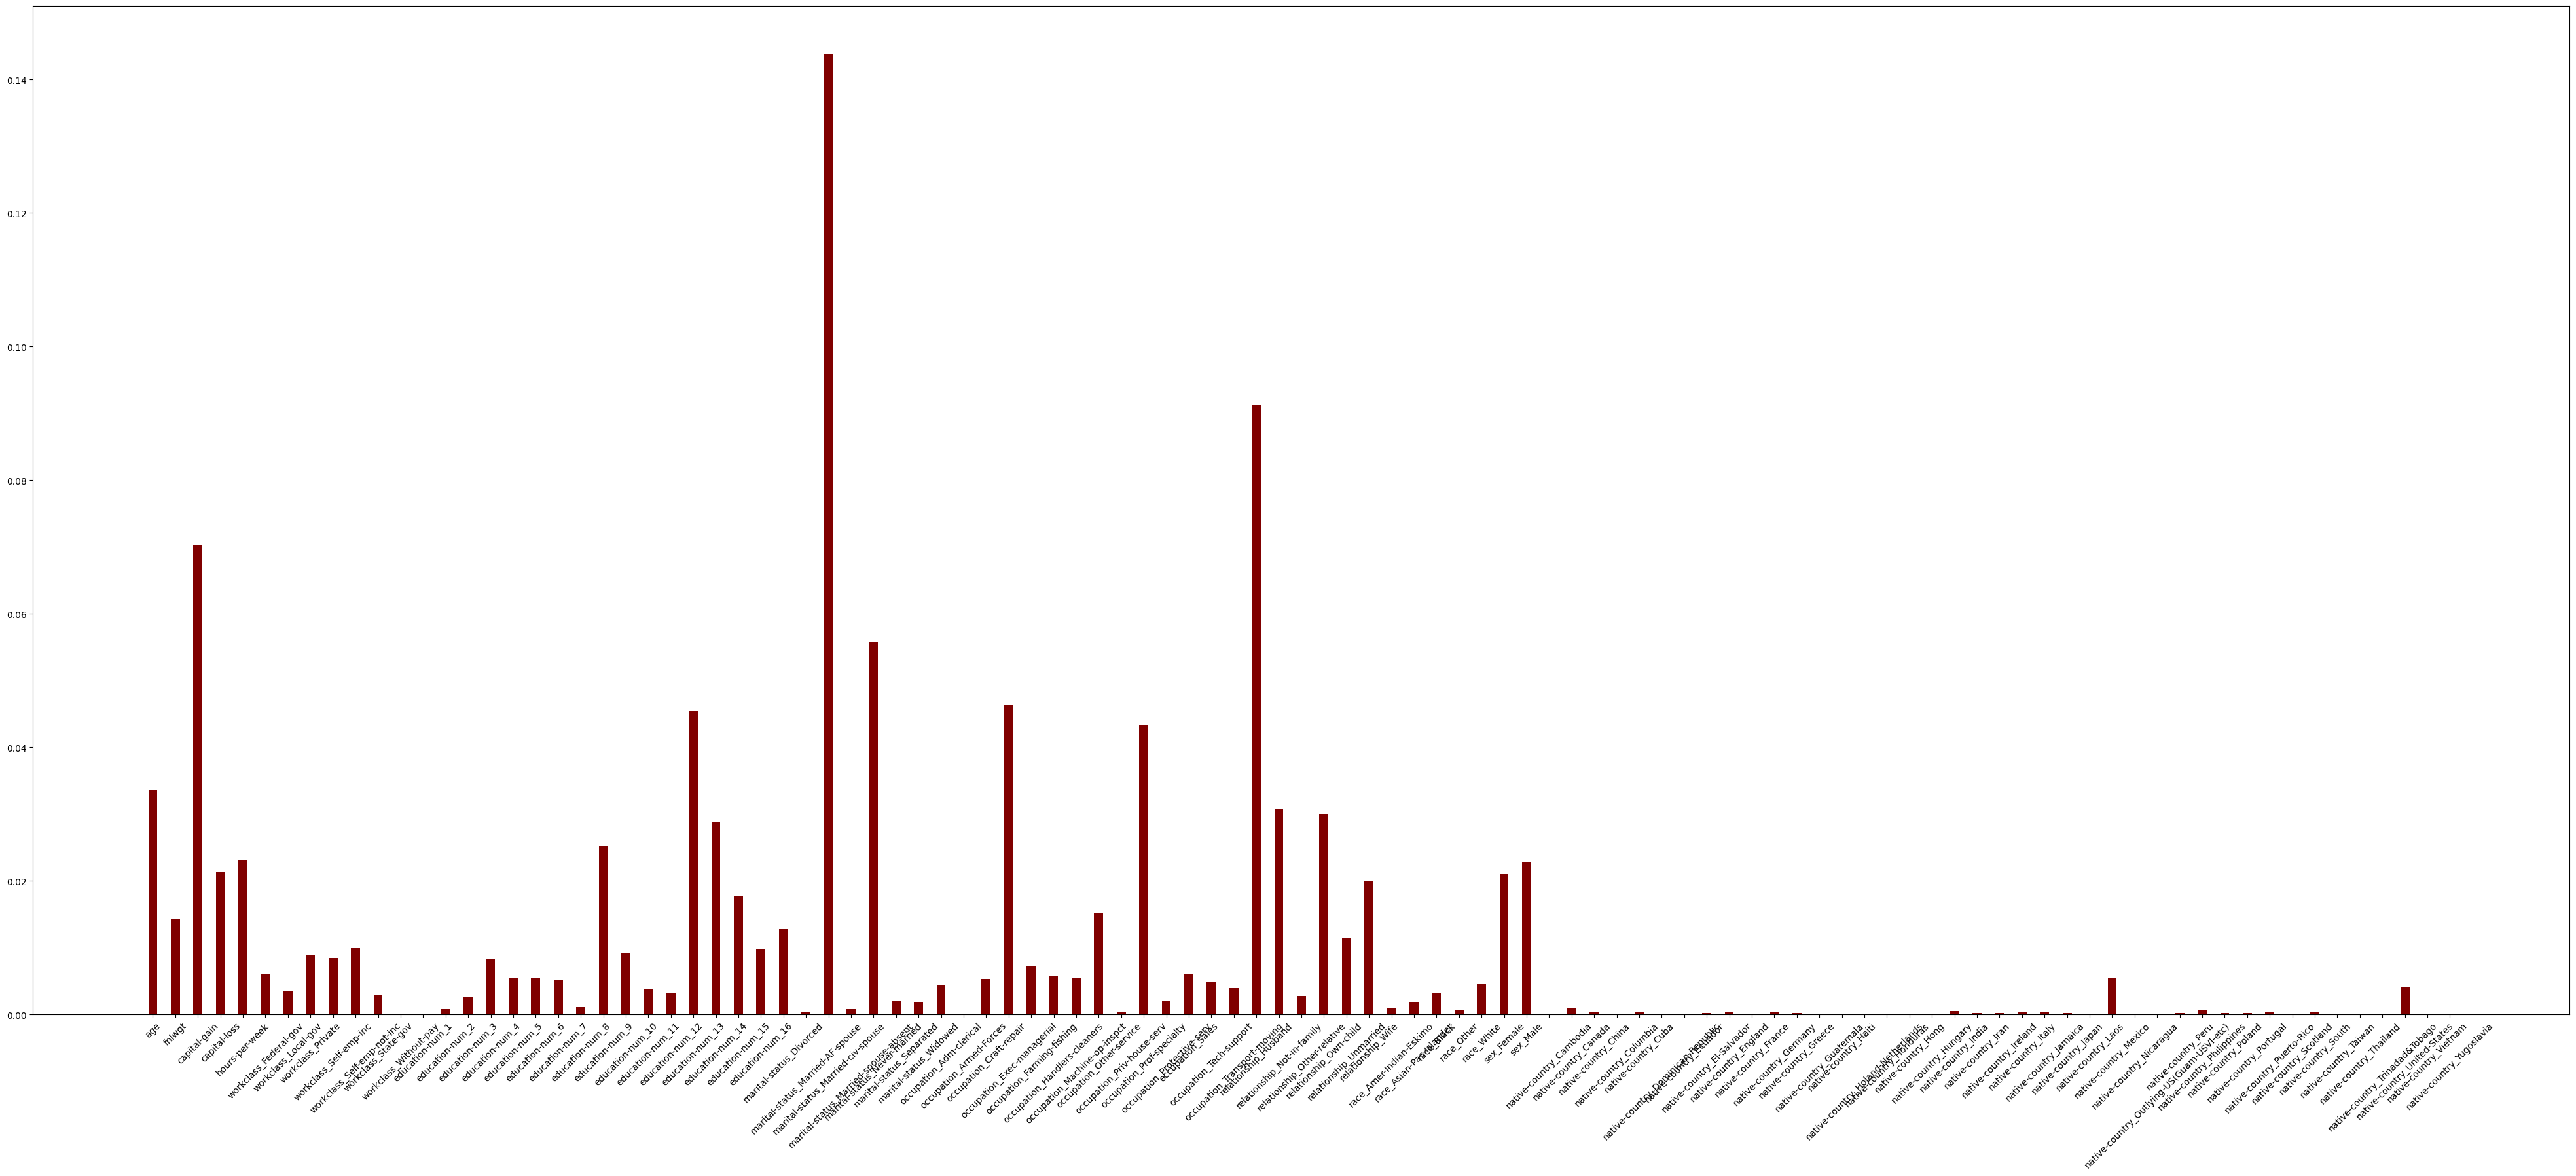

c:\Users\mateu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


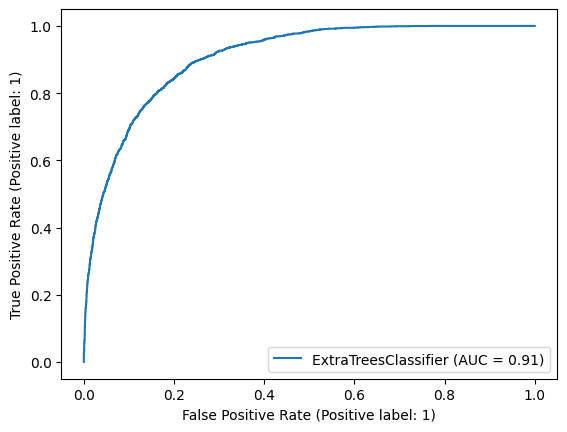

In [103]:
rf_classify(ExtraTreesClassifier(),adult_df)